# Analysis and Visualization [<svg height="1.5rem" width="1.5rem" fill="currentColor" viewBox="0 0 16 16" aria-hidden="true" xmlns="http://www.w3.org/2000/svg" class="Icon__StyledSvg-sc-6evbi1-0"><path data-testid="eds-icon-path" d="M5 3c-1.093 0-2 .907-2 2v14c0 1.093.907 2 2 2h14c1.093 0 2-.907 2-2v-7h-2v7H5V5h7V3H5Zm9 0v2h3.586l-9.293 9.293 1.414 1.414L19 6.414V10h2V3h-7Z" height="24" fill-rule="evenodd" clip-rule="evenodd" transform="scale(0.6666666666666666)" class="Icon__StyledPath-sc-6evbi1-1 jzkZsK"></path></svg>]()

After creating numerous subsets to account for various data classifications, it is now time to graphically analyze the dataset to understand trends and identify patterns in the production history.

This notebook covers the following topics:

- [Getting the notebook ready](#getting-the-notebook-ready)
- [Annual Production](#annual-production)
- [Monthly Production](#monthly-production)
- [Wellbore Yield Comparison](#wellbore-yield-comparison)
- [Wellbore Production Analysis](#wellbore-production-analysis)
- [Chronology of Events](#chronology-of-events)

<br>

>**Note:** Unfortunately, GitHub does not render Plotly charts. To render the interactive charts in this notebook, you will have to paste the notebook URL on [nbviewer](https://nbviewer.org/).

In [1]:
import pandas as pd
import functions as fn

In [2]:
volve_df = pd.read_excel(io="../../Data/raw-data/Volve production data.xlsx", sheet_name="Monthly Production Data")

In [3]:
volve_df = fn.clean_data(volve_df)

## Getting the notebook ready

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
sns.set_style("darkgrid")

matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.facecolor"] = "#0000"

In [6]:
volumes = {
    "OIL": 0.1589873,  # 1 bbl = 0.1589873 m3
    "GAS": 0.0283168,  # 1 scf = 0.0283168 m3
    "WATER": 0.1589873,  # conversion to have the equivalent in barrels
}

## Annual Production

In [7]:
annual_production_df, annual_injection_df = fn.generate_annual_dataframes(volve_df).values()

In [8]:
layout = go.Layout(
    title="<b>Annual Oil Production (m<sup>3</sup>)</b>",
    xaxis=dict(
        title="Year",
        tickmode="array",
        tickvals=annual_production_df["YEAR"]
    ),
    yaxis=dict(
        title="Oil Volume",
        hoverformat=",.0f"
    ),
    font_size=14,
    width=900,
    height=580
)

trace1 = go.Scatter(
    x=annual_production_df["YEAR"],
    y=annual_production_df["OIL"],
    customdata=(annual_production_df["OIL"] / volumes.get("OIL")),
    hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y}"]),
    line=dict(color="red", dash="dash", shape="spline", width=3),
    marker_size=10,
    name="Profile"
)

trace2 = go.Bar(
    x=annual_production_df["YEAR"],
    y=annual_production_df["OIL"],
    customdata=annual_production_df["OIL"] / volumes.get("OIL"),
    hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y}"]),
    marker=dict(color="lime", line=dict(color="white", width=1.2)),
    name="Distribution"
)

go.Figure(data=[trace1, trace2], layout=layout)

In [9]:
layout = go.Layout(
    title="<b>Annual Gas Production (m<sup>3</sup>)</b>",
    xaxis=dict(
        title="Year",
        tickmode="array",
        tickvals=annual_production_df["YEAR"]
    ),
    yaxis=dict(
        title="Gas Volume",
        hoverformat=",.0f"
    ),
    font_size=14,
    width=900,
    height=580
)

trace1 = go.Scatter(
    x=annual_production_df["YEAR"],
    y=annual_production_df["GAS"],
    customdata=annual_production_df["GAS"] / volumes.get("GAS"),
    hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>SCF:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y}"]),
    line=dict(color="darkcyan", dash="dash", shape="spline", width=3),
    marker_size=10,
    name="Profile"
)

trace2 = go.Bar(
    x=annual_production_df["YEAR"],
    y=annual_production_df["GAS"],
    customdata=(annual_production_df["GAS"] / volumes.get("GAS")),
    hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>SCF:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y}"]),
    marker=dict(color="tomato", line=dict(color="white", width=1.2)),
    name="Distribution"
)

go.Figure(data=[trace1, trace2], layout=layout)

### Observations

- Hydrocarbon production began in **2008**
- There was a peak in production in **2009**, followed by a continuous decline until **2013**
- The graphs show a slight increase in production between **2014** and **2015**
- The field was abandoned in **2016**

### Question

- What can justify the sudden decline in production after **2009**?

In [10]:
layout = go.Layout(
    title="<b>Annual Liquid Production (m<sup>3</sup>)</b>",
    xaxis=dict(
        title="Year",
        tickmode="array",
        tickvals=annual_production_df["YEAR"]
    ),
    yaxis=dict(
        title="Liquid Volume",
        hoverformat=",.0f"
    ),
    hovermode="x unified",
    font_size=14,
    width=900,
    height=580
)

trace1 = go.Scatter(
    x=annual_production_df["YEAR"],
    y=annual_production_df["OIL"],
    line=dict(color="lime", shape="spline", width=3),
    marker_size=10,
    name="Oil"
)

trace2 = go.Scatter(
    x=annual_production_df["YEAR"],
    y=annual_production_df["WATER"],
    line=dict(color="blue", shape="spline", width=3),
    marker_size=10,
    name="Water"
)

go.Figure(data=[trace1, trace2], layout=layout)

### Answer

The above graph depicts an abrupt increase in water production from **2010**, corresponding to a decrease in oil production. This implies that the decrease in hydrocarbon production over time was due to the water breakthrough.

### Question

- What was the origin of the produced water?

**Note:** In the event of a water breakthrough, produced water may originate from natural aquifers or injectors after waterflooding. To clearly identify the origin of water production, let's compare the annual liquid production to the annual water injection.

In [11]:
layout = go.Layout(
    title="<b>Liquid Production Vs. Water Injection (m<sup>3</sup>)</b>",
    legend=dict(orientation="h", x=0.35, y=-0.15),
    xaxis=dict(
        title="Year",
        tickmode="array",
        tickvals=annual_production_df["YEAR"]
    ),
    yaxis=dict(
        title="Liquid Volume",
        hoverformat=",.0f"
    ),
    font_size=14,
    width=900,
    height=600
)

trace1 = go.Scatter(
    x=annual_production_df["YEAR"],
    y=annual_production_df["OIL"],
    customdata=(annual_production_df["OIL"] / volumes.get("OIL")),
    hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y}"]),
    line=dict(color="#19CA9C", width=3, shape="spline"),
    marker_size=10,
    name="OIL"
)

trace2 = go.Scatter(
    x=annual_production_df["YEAR"],
    y=annual_production_df["WATER"],
    customdata=(annual_production_df["WATER"] / volumes.get("WATER"),)
    hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y}"]),
    line=dict(color="#636EFA", width=3, shape="spline"),
    marker_size=10,
    name="WATER"
)

trace3 = go.Scatter(
    x=annual_injection_df["YEAR"],
    y=annual_injection_df["WI"],
    customdata=(annual_injection_df["WI"] / volumes.get("WATER")),
    hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y}"]),
    line=dict(color="#AB63FA", width=3, shape="spline"),
    marker_size=10,
    name="WI"
)

go.Figure(data=[trace1, trace2, trace3], layout=layout)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2698587492.py, line 31)

### Observations

- The above graph shows that secondary recovery via water injection also began in **2008**.
- From **2008** to **2009**, injected water along with natural drives provided a good sweep efficiency.
- From **2010** onwards, there was a change in the oil-to-water ratio in favor of water despite an ever-increasing water injection.

### Conclusion

For the first two years of the field's life `(2008 - 2009)`, produced water originated from natural aquifers. From **2010** onwards, produced water originated from injectors after waterflooding, as we notice a significant increase in water injection rates, aligning with the abrupt change in the oil-to-water ratio. Moreover, there is a noticeable trend between water production and water injection from **2012**.

### Question

- What could be the reason behind the increase in production between **2014** and **2015**?

### Answer

As mentioned in the [previous notebook](https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&bypass_fastly=true&color_mode=auto&commit=b92c1b1a9bd026eca38484b32e67b26c13bef98d&device=unknown_device&docs_host=https%3A%2F%2Fdocs.github.com&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f4c616d793233372f566f6c76652d6669656c642f623932633162316139626430323665636133383438346233326536376232366331336265663938642f50726f64756374696f6e2f4544412f4544412532306f6e2532304d6f6e74686c79253230446174612f6e6f7465626f6f6b322e6970796e62&logged_in=true&nwo=Lamy237%2FVolve-field&path=Production%2FEDA%2FEDA+on+Monthly+Data%2Fnotebook2.ipynb&platform=windows&repository_id=659379612&repository_type=Repository&version=117), the Volve field adopted a new drilling program in **2014** after a successful exploration pilot improved the amount of proved reserves <cite>([Statoil 2014](https://cdn.equinor.com/files/h61q9gi9/global/f7148331f9bfa5ddb7b7b9851bc94e9bff66dfb0.pdf?statoil-annual-report-20-F-2013.pdf), [2015](https://cdn.equinor.com/files/h61q9gi9/global/b2c0248e609fa8783137514d8fd0ca09f9a1ec5e.pdf?Statoil-20-F-2014.pdf))</cite>. Three new wellbores were drilled between **2013** and **2014**, leading to an increase in hydrocarbon production.

[Back to Top](#analysis-and-visualization)

## Monthly Production

In [12]:
monthly_oil_production_df, monthly_gas_production_df = (fn.generate_monthly_dataframes(volve_df).get(key) for key in ("OIL", "GAS"))

In [13]:
layout = go.Layout(
    title="<b>Monthly Oil Production (m<sup>3</sup>)</b>",
    xaxis=dict(
        title="Year",
        tickmode="array",
        tickvals=monthly_oil_production_df.columns
    ),
    yaxis=dict(
        title="Month",
        autorange="reversed"
    ),
    font_size=14,
    width=900,
    height=580
)

trace = go.Heatmap(
    x=monthly_oil_production_df.columns,
    y=monthly_oil_production_df.index,
    z=monthly_oil_production_df.values,
    customdata=(monthly_oil_production_df.values / volumes.get("OIL")),
    hovertemplate="<br>".join(["<b>%{y} %{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{z:,.0f}"]),
    hoverlabel=dict(bgcolor="#F2FBF0", font_color="#333"),
    colorscale="Greens",
    name=""
)

go.Figure(data=[trace], layout=layout)

In [14]:
layout = go.Layout(
    title="<b>Monthly Gas Production (m<sup>3</sup>)</b>",
    xaxis=dict(
        title="Year",
        tickmode="array",
        tickvals=monthly_gas_production_df.columns
    ),
    yaxis=dict(
        title="Month",
        autorange="reversed"
    ),
    font_size=14,
    width=900,
    height=580
)

trace = go.Heatmap(
    x=monthly_gas_production_df.columns,
    y=monthly_gas_production_df.index,
    z=monthly_gas_production_df.values,
    customdata=(monthly_gas_production_df.values / volumes.get("GAS")),
    hovertemplate="<br>".join(["<b>%{y} %{x}</b><br>", "<b>SCF:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{z:,.0f}"]),
    hoverlabel=dict(bgcolor="#FEF5F1", font_color="#333"),
    colorscale="Reds",
    name=""
)

go.Figure(data=[trace], layout=layout)

### Observations

- Hydrocarbon production began exactly in **February 2008** and ended in **September 2016**.
- Produced volumes began to decline in **April 2008**, only two months after the beginning of production operations.
- The highest recorded production was in **December 2008**, and the lowest one in **September 2012**.

### Questions

- When did secondary recovery begin?
- What caused the poor performance recorded in **September 2012**?

In [15]:
monthly_water_injection_df = fn.monthly_data(volve_df, parameter="WI")

In [16]:
layout = go.Layout(
    title="<b>Monthly Water Injection (m<sup>3</sup>)</b>",
    xaxis=dict(
        title="Year",
        tickmode="array",
        tickvals=monthly_water_injection_df.columns,
    ),
    yaxis=dict(
        title="Month",
        autorange="reversed"
    ),
    font_size=14,
    width=900,
    height=580
)

trace = go.Heatmap(
    x=monthly_water_injection_df.columns,
    y=monthly_water_injection_df.index,
    z=monthly_water_injection_df.values,
    customdata=(monthly_water_injection_df.values / volumes.get("WATER")),
    hovertemplate="<br>".join(["<b>%{y} %{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{z:,.0f}"]),
    hoverlabel=dict(bgcolor="aliceblue", font_color="#333"),
    colorscale="Blues",
    name=""
)

go.Figure(data=[trace], layout=layout)

### Answers

- Secondary recovery via water injection started in **April 2008** to maintain the reservoir pressure, as hydrocarbon production had begun to decline.

- The [2012 Annual Report](https://cdn.equinor.com/files/h61q9gi9/global/b9a38e453593f930bdec33efa5a085b626cb4aab.pdf?statoil-annual-report-20f-2012.pdf) from **Equinor/Statoil** states that the Volve field was temporarily shut down due to anchor line problems *(Page 77)*. We can therefore deduce from the above graphs that the shut down was between **August** and **September 2012**. However, analyzing the monthly production of each wellbore is necessary to confirm this hypothesis.

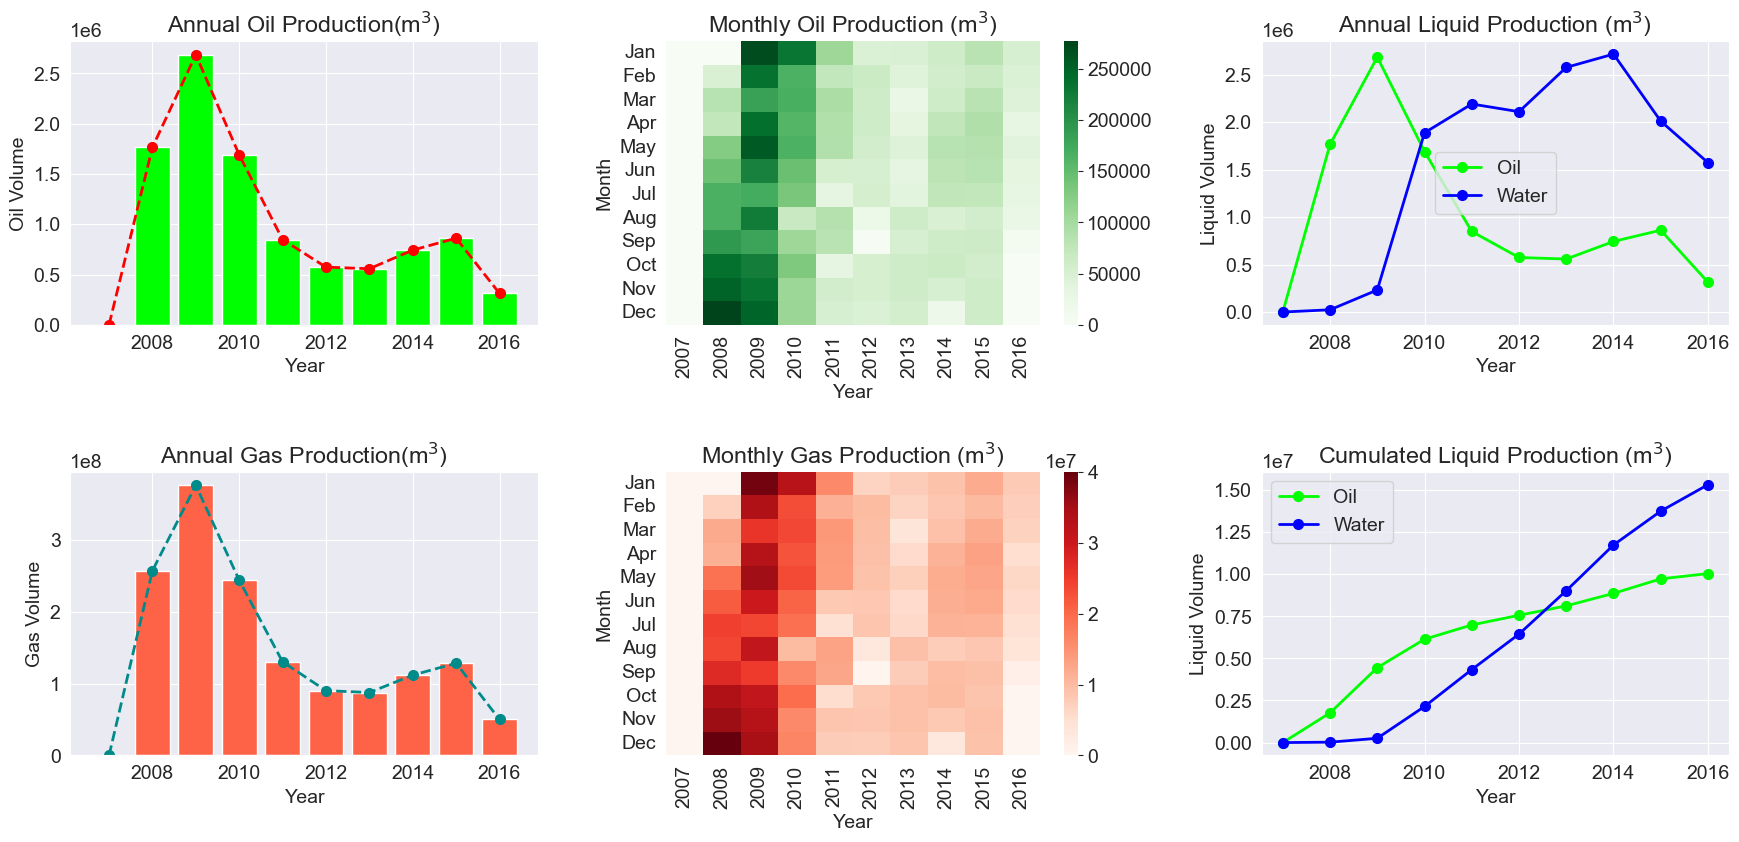

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(18, 9))

axes[0, 0].bar(annual_production_df["YEAR"], annual_production_df["OIL"], color="lime")
axes[0, 0].plot(annual_production_df["YEAR"], annual_production_df["OIL"], "o--r", lw=2, ms=7)
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Oil Volume")
axes[0, 0].set_title("Annual Oil Production(m$^3$)")

sns.heatmap(monthly_oil_production_df, cmap="Greens", ax=axes[0, 1])
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Month")
axes[0, 1].set_title("Monthly Oil Production (m$^3$)")

axes[0, 2].plot(annual_production_df["YEAR"], annual_production_df["OIL"], color="lime", lw=2, marker="o", ms=7, label="Oil")
axes[0, 2].plot(annual_production_df["YEAR"], annual_production_df["WATER"], color="blue", lw=2, marker="o", ms=7, label="Water")
axes[0, 2].set_xlabel("Year")
axes[0, 2].set_ylabel("Liquid Volume")
axes[0, 2].legend(loc="center")
axes[0, 2].set_title("Annual Liquid Production (m$^3$)")

axes[1, 0].bar(annual_production_df["YEAR"], annual_production_df["GAS"], color="tomato")
axes[1, 0].plot(annual_production_df["YEAR"], annual_production_df["GAS"], color="darkcyan", ls="--", lw=2, marker="o", ms=7)
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Gas Volume")
axes[1, 0].set_title("Annual Gas Production(m$^3$)")

sns.heatmap(monthly_gas_production_df, cmap="Reds", ax=axes[1, 1])
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Month")
axes[1, 1].set_title("Monthly Gas Production (m$^3$)")

axes[1, 2].plot(annual_production_df["YEAR"], annual_production_df["CUM_OIL"], color="lime", lw=2, marker="o", ms=7, label="Oil")
axes[1, 2].plot(annual_production_df["YEAR"], annual_production_df["CUM_WATER"], color="blue", lw=2, marker="o", ms=7, label="Water")
axes[1, 2].set_xlabel("Year")
axes[1, 2].set_ylabel("Liquid Volume")
axes[1, 2].legend()
axes[1, 2].set_title("Cumulated Liquid Production (m$^3$)")

plt.tight_layout(pad=2)

[Back to Top](#analysis-and-visualization)

## Wellbore Yield Comparison

### Questions

- Which wellbores produced the highest and lowest amounts of hydrocarbon?
- Which wellbore was the biggest water producer?

In [18]:
production_wells_df, injection_wells_df = (fn.generate_wellbores_dataframes(volve_df).get(key) for key in ("PRODUCTION", "INJECTION"))

In [19]:
layout = go.Layout(
    title="<b>Fluid Production per Wellbore (m<sup>3</sup>)</b>",
    xaxis_title="Wellbore name",
    yaxis=dict(
        title="Liquid Volume",
        hoverformat=",.0f"
    ),
    yaxis2=dict(
        title="Gas Volume",
        overlaying="y",
        side="right",
        hoverformat=",.0f"
    ),
    legend=dict(orientation="h", x=0.35, y=-0.15),
    font_size=14,
    width=900,
    height=580
)

trace1 = go.Bar(
    x=production_wells_df["WELLBORE_NAME"],
    y=production_wells_df["OIL"],
    customdata=(production_wells_df["OIL"] / volumes.get("OIL")),
    hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y}"]),
    marker=dict(color="#19CA9C", line=dict(color="whitesmoke", width=1.2)),
    offsetgroup=1,
    yaxis="y1",
    name="OIL"
)

trace2 = go.Bar(
    x=production_wells_df["WELLBORE_NAME"],
    y=production_wells_df["GAS"],
    customdata=(production_wells_df["GAS"] / volumes.get("GAS")),
    hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>SCF:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y}"]),
    marker=dict(color="#EE553C", line=dict(color="whitesmoke", width=1.2)),
    offsetgroup=2,
    yaxis="y2",
    name="GAS"
)

trace3 = go.Bar(
    x=production_wells_df["WELLBORE_NAME"],
    y=production_wells_df["WATER"],
    customdata=(production_wells_df["WATER"] / volumes.get("WATER")),
    hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y}"]),
    marker=dict(color="#636EFA", line=dict(color="whitesmoke", width=1.2)),
    offsetgroup=3,
    yaxis="y1",
    name="WATER"
)

go.Figure(data=[trace1, trace2, trace3], layout=layout)

### Answers

- The wellbore `15/9-F-12` produced the highest amount of hydrocarbon.
- The wellbore `15/9-F-5` produced the lowest amount of hydrocarbon. This is because its production life only began in **April 2016**, after being employed as an injection wellbore for waterflooding since **August 2016**.
- The wellbore `15/9-F-14` was the biggest water producer. The high amount of produced water from the wellbore may indicate a poor management of water production.

In [20]:
layout = go.Layout(
    title="<b>Water Injection per Wellbore (m<sup>3</sup>)</b>",
    xaxis_title="Wellbore name",
    yaxis=dict(
        title="Water Volume",
        hoverformat=",.0f"
    ),
    font_size=14,
    width=900,
    height=580
)

trace = go.Bar(
    x=injection_wells_df["WELLBORE_NAME"],
    y=injection_wells_df["WI"],
    customdata=(injection_wells_df["WI"] / volumes.get("WATER")),
    hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y}"]),
    hoverlabel=dict(bgcolor="aliceblue", font_color="#333"),
    marker=dict(color=injection_wells_df["WI"], colorscale="Blues", line=dict(color="gray", width=1.2)),
    name=""
)

go.Figure(data=[trace], layout=layout)

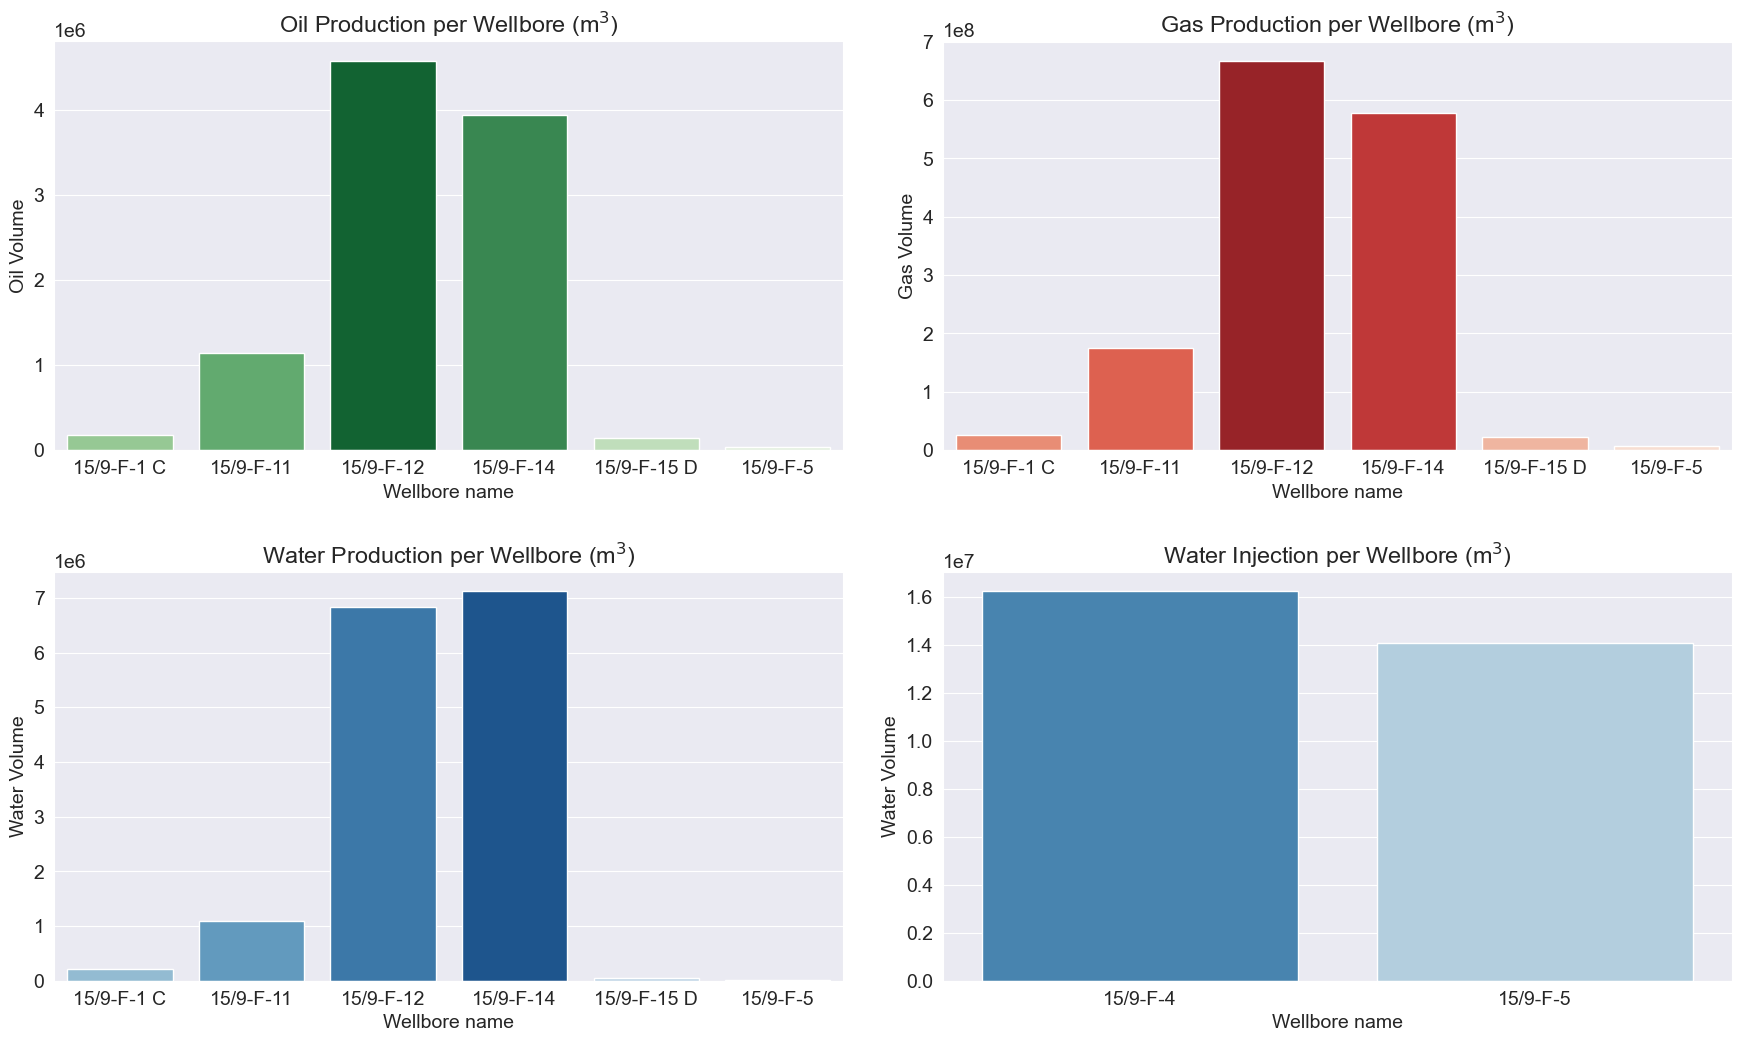

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(18, 11))

sns.barplot(x="WELLBORE_NAME", y="OIL", hue="OIL", palette="Greens", dodge=False, data=production_wells_df, ax=axes[0, 0]).legend_.remove()
axes[0, 0].set_xlabel("Wellbore name")
axes[0, 0].set_ylabel("Oil Volume")
axes[0, 0].set_title("Oil Production per Wellbore (m$^3$)")

sns.barplot(x="WELLBORE_NAME", y="GAS", hue="GAS", palette="Reds", dodge=False, data=production_wells_df, ax=axes[0, 1]).legend_.remove()
axes[0, 1].set_xlabel("Wellbore name")
axes[0, 1].set_ylabel("Gas Volume")
axes[0, 1].set_title("Gas Production per Wellbore (m$^3$)")

sns.barplot(x="WELLBORE_NAME", y="WATER", hue="WATER", palette="Blues", dodge=False, data=production_wells_df, ax=axes[1, 0]).legend_.remove()
axes[1, 0].set_xlabel("Wellbore name")
axes[1, 0].set_ylabel("Water Volume")
axes[1, 0].set_title("Water Production per Wellbore (m$^3$)")

sns.barplot(x="WELLBORE_NAME", y="WI", hue="WI", palette="Blues", dodge=False, data=injection_wells_df, ax=axes[1, 1]).legend_.remove()
axes[1, 1].set_xlabel("Wellbore name")
axes[1, 1].set_ylabel("Water Volume")
axes[1, 1].set_title("Water Injection per Wellbore (m$^3$)")

plt.tight_layout(pad=2)

[Back to Top](#analysis-and-visualization)

## Wellbore Production Analysis

The individual analysis of each wellbore will help provide a more accurate picture of the events. As there are seven (07) wellbores in the dataset, analyzing them one after the other would be time-consuming. We will therefore proceed by creating functions to automate the process.

In [22]:
# PRODUCTION WELLS

def analyze_production_wellbore(data: pd.DataFrame, well_name: str) -> go.Figure:
    fig = make_subplots(
        rows=2,
        cols=2,
        vertical_spacing=0.175,
        subplot_titles=(
            "<b>Annual Oil Production (m<sup>3</sup>)</b>", "<b>Monthly Oil Production (m<sup>3</sup>)</b>", 
            "<b>Annual Gas Production (m<sup>3</sup>)</b>", "<b>Monthly Gas Production (m<sup>3</sup>)</b>"
        )
    )

    annual_df = fn.annual_data(data, well_name)
    monthly_oil_df, monthly_gas_df = (fn.generate_monthly_dataframes(data, well_name).get(key) for key in ("OIL", "GAS"))

    trace1 = go.Bar(
        x=annual_df["YEAR"],
        y=annual_df["OIL"],
        customdata=(annual_df["OIL"] / volumes.get("OIL")),
        hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y:,.0f}"]),
        marker=dict(color="mediumspringgreen", line=dict(color="whitesmoke", width=1.2)),
        showlegend=False,
        name=""
    )

    trace2 = go.Heatmap(
        x=monthly_oil_df.columns,
        y=monthly_oil_df.index,
        z=monthly_oil_df.values,
        customdata=(monthly_oil_df.values / volumes.get("OIL")),
        hovertemplate="<br>".join(["<b>%{y} %{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{z:,.0f}"]),
        hoverlabel=dict(bgcolor="#F2FBF0", font_color="#333"),
        colorscale="Greens",
        showscale=False,
        name=""
    )

    trace3 = go.Bar(
        x=annual_df["YEAR"],
        y=annual_df["GAS"],
        customdata=(annual_df["GAS"] / volumes.get("GAS")),
        hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>SCF:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y:,.0f}"]),
        marker=dict(color="crimson", line=dict(color="whitesmoke", width=1.2)),
        showlegend=False,
        name=""
    )

    trace4 = go.Heatmap(
        x=monthly_gas_df.columns,
        y=monthly_gas_df.index,
        z=monthly_gas_df.values,
        customdata=(monthly_gas_df.values / volumes.get("GAS")),
        hovertemplate="<br>".join(["<b>%{y} %{x}</b><br>", "<b>SCF:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{z:,.0f}"]),
        hoverlabel=dict(bgcolor="#FEF5F1", font_color="#333"),
        colorscale="Reds",
        showscale=False,
        name=""
    )

    data = [trace1, trace2, trace3, trace4]
    i = 0

    for row in range(1, 3):
        for col in range(1, 3):
            fig.add_trace(data[i], row=row, col=col)
            i += 1
            fig.update_xaxes(title="Year", tickmode="array", tickvals=annual_df["YEAR"], row=row, col=col)
    
    fig.update_yaxes(title=dict(text="Oil Volume", standoff=3), row=1, col=1)
    fig.update_yaxes(title=dict(text="Gas Volume", standoff=3), row=2, col=1)
    fig.update_yaxes(title=dict(text="Month", standoff=3), autorange="reversed", row=1, col=2)
    fig.update_yaxes(title=dict(text="Month", standoff=3), autorange="reversed", row=2, col=2)

    for trace in fig.layout.annotations:
        trace.font.size = 18

    fig.update_layout(
        title=dict(text=f"<b>Wellbore {well_name.upper()}</b>", font_size=20), 
        height=1000, 
        font_size=14,
        margin=dict(t=120)
    )

    return fig

In [23]:
# INJECTION WELLS

def analyze_injection_wellbore(data: pd.DataFrame, well_name: str) -> go.Figure:
    fig = make_subplots(
        rows=1,
        cols=2,
        subplot_titles=(
            "<b>Annual Water Injection (m<sup>3</sup>)</b>", 
            "<b>Monthly Water Injection (m<sup>3</sup>)</b>"
        )
    )

    annual_df = fn.annual_data(data, well_name)
    monthly_water_injection_df = fn.monthly_data(data, well_name, parameter="WI")

    trace1 = go.Bar(
        x=annual_df["YEAR"],
        y=annual_df["WI"],
        customdata=(annual_df["WI"] / volumes.get("WATER")),
        hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y:,.0f}"]),
        hoverlabel=dict(bgcolor="aliceblue", font_color="#333"),
        marker=dict(color="deepskyblue", line=dict(color="whitesmoke", width=1.2)),
        name=""
    )

    trace2 = go.Heatmap(
        x=monthly_water_injection_df.columns,
        y=monthly_water_injection_df.index,
        z=monthly_water_injection_df.values,
        customdata=(monthly_water_injection_df.values / volumes.get("WATER")),
        hovertemplate="<br>".join(["<b>%{y} %{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{z:,.0f}"]),
        hoverlabel=dict(bgcolor="aliceblue", font_color="#333"),
        colorscale="Blues",
        showscale=False,
        name=""
    )

    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=1, col=2)

    for col in range(1, 3):
        fig.update_xaxes(title="Year", tickmode="array", tickvals=annual_df["YEAR"], row=1, col=col)
    
    fig.update_yaxes(title=dict(text="Water Volume", standoff=3), col=1)
    fig.update_yaxes(title=dict(text="Month", standoff=3), autorange="reversed", col=2)

    for trace in fig.layout.annotations:
        trace.font.size = 18
    
    fig.update_layout(
        title=dict(text=f"<b>Wellbore {well_name.upper()}</b>", font_size=20),
        height=530,
        font_size=14,
        margin=dict(t=120)
    )

    return fig

In [24]:
# HYBRID WELLS

def analyze_hybrid_wellbore(data: pd.DataFrame, well_name: str) -> go.Figure:
    fig = make_subplots(
        rows=2,
        cols=3,
        vertical_spacing=0.185,
        subplot_titles=(
            "<b>Annual Oil Production (m<sup>3</sup>)</b>", "<b>Annual Gas Production (m<sup>3</sup>)</b>",
            "<b>Annual Water Injection (m<sup>3</sup>)</b>", "<b>Monthly Oil Production (m<sup>3</sup>)</b>", 
            "<b>Monthly Gas Production (m<sup>3</sup>)</b>", "<b>Monthly Water Injection (m<sup>3</sup>)</b>"
        )
    )

    annual_df = fn.annual_data(data, well_name)
    monthly_oil_df, monthly_gas_df, monthly_wi_df = (fn.generate_monthly_dataframes(data, well_name).get(key) for key in ("OIL", "GAS", "WI"))

    trace1 = go.Bar(
        x=annual_df["YEAR"],
        y=annual_df["OIL"],
        customdata=(annual_df["OIL"] / volumes.get("OIL")),
        hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y:,.0f}"]),
        marker=dict(color="mediumspringgreen", line=dict(color="whitesmoke", width=1.2)),
        showlegend=False,
        name=""
    )

    trace2 = go.Bar(
        x=annual_df["YEAR"],
        y=annual_df["GAS"],
        customdata=(annual_df["GAS"] / volumes.get("GAS")),
        hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>SCF:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y:,.0f}"]),
        marker=dict(color="crimson", line=dict(color="whitesmoke", width=1.2)),
        showlegend=False,
        name=""
    )

    trace3 = go.Bar(
        x=annual_df["YEAR"],
        y=annual_df["WI"],
        customdata=(annual_df["WI"] / volumes.get("WATER")),
        hovertemplate="<br>".join(["<b>%{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{y:,.0f}"]),
        marker=dict(color="deepskyblue", line=dict(color="whitesmoke", width=1.2)),
        showlegend=False,
        name=""
    )

    trace4 = go.Heatmap(
        x=monthly_oil_df.columns,
        y=monthly_oil_df.index,
        z=monthly_oil_df.values,
        customdata=(monthly_oil_df.values / volumes.get("OIL")),
        hovertemplate="<br>".join(["<b>%{y} %{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{z:,.0f}"]),
        hoverlabel=dict(bgcolor="#F2FBF0", font_color="#333"),
        colorscale="Greens",
        showscale=False,
        name=""
    )

    trace5 = go.Heatmap(
        x=monthly_gas_df.columns,
        y=monthly_gas_df.index,
        z=monthly_gas_df.values,
        customdata=(monthly_gas_df.values / volumes.get("GAS")),
        hovertemplate="<br>".join(["<b>%{y} %{x}</b><br>", "<b>SCF:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{z:,.0f}"]),
        hoverlabel=dict(bgcolor="#FEF5F1", font_color="#333"),
        colorscale="Reds",
        showscale=False,
        name=""
    )

    trace6 = go.Heatmap(
        x=monthly_wi_df.columns,
        y=monthly_wi_df.index,
        z=monthly_wi_df.values,
        customdata=(monthly_wi_df.values / volumes.get("WATER")),
        hovertemplate="<br>".join(["<b>%{y} %{x}</b><br>", "<b>barrels:</b> %{customdata:,.0f}", "<b>cubic meters:</b> %{z:,.0f}"]),
        hoverlabel=dict(bgcolor="aliceblue", font_color="#333"),
        colorscale="Blues",
        showscale=False,
        name=""
    )

    data = [trace1, trace2, trace3, trace4, trace5, trace6]
    i = 0

    for row in range(1, 3):
        for col in range(1, 4):
            fig.add_trace(data[i], row=row, col=col)
            i += 1
            fig.update_xaxes(title="Year", tickmode="array", tickvals=annual_df["YEAR"], row=row, col=col)
    
    fig.update_yaxes(title=dict(text="Oil Volume", standoff=3), row=1, col=1)
    fig.update_yaxes(title=dict(text="Gas Volume", standoff=3), row=1, col=2)
    fig.update_yaxes(title=dict(text="Water Volume", standoff=3), row=1, col=3)
    fig.update_yaxes(title=dict(text="Month", standoff=3), autorange="reversed", row=2, col=1)
    fig.update_yaxes(title=dict(text="Month", standoff=3), autorange="reversed", row=2, col=2)
    fig.update_yaxes(title=dict(text="Month", standoff=3), autorange="reversed", row=2, col=3)

    for trace in fig.layout.annotations:
        trace.font.size = 18

    fig.update_layout(
        title=dict(text=f"<b>Wellbore {well_name.upper()}</b>", font_size=20),
        height=810,
        font_size=14,
        margin=dict(t=120)
    )

    return fig

In [25]:
def analyze_wellbore(data: pd.DataFrame, well_name: str) -> go.Figure:
    well_type = fn.determine_well_type(data, well_name)

    if well_type == "PRODUCTION":
        return analyze_production_wellbore(data, well_name)
    elif well_type == "INJECTION":
        return analyze_injection_wellbore(data, well_name)
    else:
        return analyze_hybrid_wellbore(data, well_name)

In [26]:
analyze_wellbore(volve_df, "15/9-F-12")

In [27]:
analyze_wellbore(volve_df, "15/9-F-14")

In [28]:
analyze_wellbore(volve_df, "15/9-F-11")

In [29]:
analyze_wellbore(volve_df, "15/9-F-15 D")

In [30]:
analyze_wellbore(volve_df, "15/9-F-1 C")

In [31]:
analyze_wellbore(volve_df, "15/9-F-4")

In [32]:
analyze_wellbore(volve_df, "15/9-F-5")

[Back to Top](#analysis-and-visualization)

## Chronology of Events

### 2008
- **Feb:** Beginning of hydrocarbon production from the wellbore `15/9-F-12` <br><br>
- **Apr:** Beginning of secondary recovery via water injection from the wellbore `15/9-F-4` <br><br>
- **Jul:** The wellbore `15/9-F-14` started producing hydrocarbons <br><br>
- **Aug:** Introduction of the wellbore `15/9-F-5` to aid in water injection <br><br>

### 2012
- **Aug - Sep:** The field was temporarily shut down due to an anchor line repair. There is a noticeable decrease in hydrocarbon production and water injection for the wellbores `F12`, `F14`, `F4`, and `F5`. <br><br>

### 2013
- **Jul**: The wellbore `15/9-F-11` started producing hydrocarbons (*New wellbore*) <br><br>

### 2014
- **Jan:** The wellbore `15/9-F-15 D` started producing hydrocarbons (*New wellbore*) <br><br>
- **Apr:** The wellbore `15/9-F-1 C` started producing hydrocarbons (*New wellbore*) <br><br>
- **Dec:** Interruption of operations for the wellbores `15/9-F-12` and `15/9-F-15 D` (*Why?*) <br><br>

### 2015
- **Jan:** Production operations re-started for the wellbores `15/9-F-12` and `15/9-F-15 D` <br><br>

### 2016
- **Apr:** End of operations for the wellbore `15/9-F-1 C` <br><br>
- **Jul:** End of operations for the wellbores `15/9-F-14` and `15/9-F-15 D` <br><br>
- **Aug:** End of operations for the wellbores `15/9-F-12` and `15/9-F-5` <br><br>
- **Sep:** End of operations for the wellbores `15/9-F-4` and `15/9-F-11` (*Abandonment of the field*) <br><br>